### https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction/code

https://www.kaggle.com/code/marto24/bankruptcy-detection

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import pylab
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
df = pd.read_csv(r'/Users/guillaume/Desktop/GoMycode/Intelligence Artificielle/FichiersCsv/TaiwanBankrupt.csv')

In [3]:
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [124]:
df.head(20)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0           1                                           0.370594          
1           1                                           0.464291          
2           1                                           0.426071          
3           1                                           0.399844          
4           1                                           0.465022          
5           1                                           0.388680          
6           0                                           0.390923          
7           0                                           0.508361          
8           0                                           0.488519          
9           0                                           0.495686          
10          0                                           0.482475          
11          0                                           0.444401          
12          0                                           0.491152          
13          0                                           0.474041          
14          0                                           0.506703          
15          0                                           0.513821          
16          0                                           0.488909          
17          0                                           0.535953          
18          0                                           0.504071          
19          0                                           0.487398          

     ROA(A) before interest and % after tax  \
0                                  0.424389   
1                                  0.538214   
2                                  0.499019   
3                                  0.451265   
4                                  0.538432   
5                                  0.415177   
6                                  0.445704   
7                                  0.570922   
8                                  0.545137   
9                                  0.550916   
10                                 0.567543   
11                                 0.549717   
12                                 0.551570   
13                                 0.533308   
14                                 0.575829   
15                                 0.571086   
16                                 0.560238   
17                                 0.590438   
18                                 0.559802   
19                                 0.543720   

     ROA(B) before interest and depreciation after tax  \
0                                            0.405750    
1                                            0.516730    
2                                            0.472295    
3                                            0.457733    
4                                            0.522298    
5                                            0.419134    
6                                            0.436158    
7                                            0.559077    
8                                            0.543284    
9                                            0.542963    
10                                           0.538198    
11                                           0.498956    
12                                           0.543391    
13                                           0.523690    
14                                           0.569838    
15                                           0.558756    
16                                           0.540286    
17                                           0.580920    
18                                           0.558649    
19                                           0.533647    

     Operating Gross Margin   Realized Sales Gross Margin  \
0                  0.601457                      0.601457   
1                  0.610235                      0.610235   
2                  0.601450           

First we want to have some information about our data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Conclusion : toutes les valeurs sont numériques, je n'ai pas de valeur catégorielle.
On a un set de 6819 entreprises et j'ai 96 caractéristiques financières sur chacune

Maintenant on veut checker si on a des valeurs nulles

In [5]:
df.isnull().sum().sum()

0

Je vais regarder l'ordre de grandeur de mes données:

In [6]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

Another check is to assess whether or not we have duplicated in our dataset:

In [7]:
df.duplicated().sum()

0

On regarde le nombre de bankruptcies

In [8]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [9]:
df1= df.copy()
cleanup_numbers =  {
    'Bankrupt?':{1: 'HasBankrupt' , 0  : 'No Bankrupt'}
}
df1.replace(cleanup_numbers , inplace=True)
df1

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0     HasBankrupt                                           0.370594          
1     HasBankrupt                                           0.464291          
2     HasBankrupt                                           0.426071          
3     HasBankrupt                                           0.399844          
4     HasBankrupt                                           0.465022          
...           ...                                                ...          
6814  No Bankrupt                                           0.493687          
6815  No Bankrupt                                           0.475162          
6816  No Bankrupt                                           0.472725          
6817  No Bankrupt                                           0.506264          
6818  No Bankrupt                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814 

<Axes: title={'center': 'Number of bankruptcies'}>

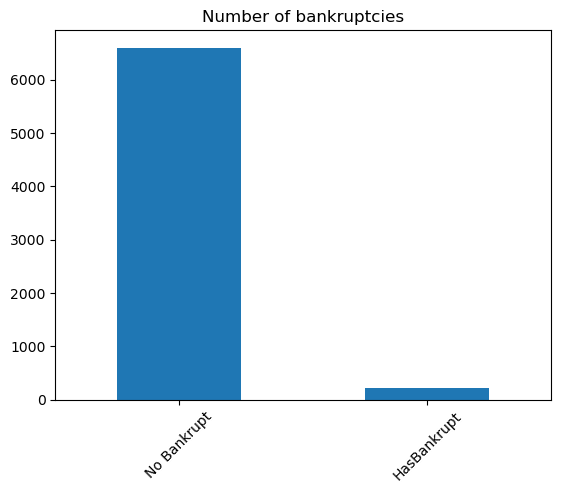

In [10]:
plt.title("Number of bankruptcies")
values_bankrupt = df1['Bankrupt?'].value_counts()
values_bankrupt.plot.bar(rot=45)

From the graph we can see that the data is clearly unbalanced, this is an issue that we will have to tackle when implementing our ML algos.

#steps

Matrice de corrélation
scatter plot
On garde les  colonnes les plus consistantes

Je vais ensuite faire 2 3 algos qui sont pas sujet a lunbalanced dataet on regarde la perf.
Si ca marche pas c est bien, sinon il faut regarder à des solutions, par example dupliquer des data etc.

### Data visualisation

On va regarder la shape de chaque variable

In [11]:
BoxName = [' ROA(C) before interest and depreciation before interest',
           ' ROA(B) before interest and depreciation after tax',
           ' Operating Gross Margin',
            ' Realized Sales Gross Margin',
       ' Operating Profit Rate',
           ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)'
          ]

In [12]:
data = [df[' ROA(C) before interest and depreciation before interest'],
        df[' ROA(B) before interest and depreciation after tax'],
        df[' Operating Gross Margin'],
        df[' Realized Sales Gross Margin'],
       df[' Operating Profit Rate'],
       df[' Pre-tax net Interest Rate'],
       df[' After-tax net Interest Rate'],
       df[' Non-industry income and expenditure/revenue'],
       df[' Continuous interest rate (after tax)'],]

([<matplotlib.axis.XTick at 0x7fd84e4ac4c0>,
 [Text(1, 0, ' ROA(C) before interest and depreciation before interest'),
  Text(2, 0, ' ROA(B) before interest and depreciation after tax'),
  Text(3, 0, ' Operating Gross Margin'),
  Text(4, 0, ' Realized Sales Gross Margin'),
  Text(5, 0, ' Operating Profit Rate'),
  Text(6, 0, ' Pre-tax net Interest Rate'),
  Text(7, 0, ' After-tax net Interest Rate'),
  Text(8, 0, ' Non-industry income and expenditure/revenue'),
  Text(9, 0, ' Continuous interest rate (after tax)')])

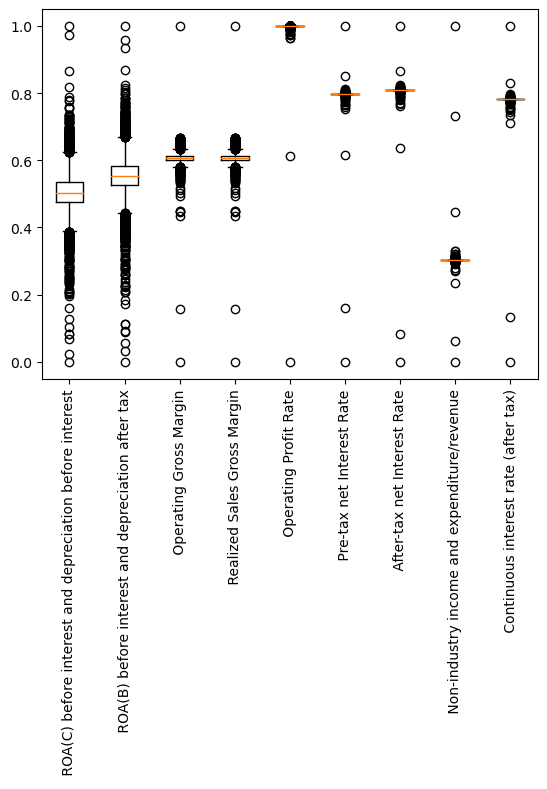

In [13]:
plt.boxplot(data)
pylab.xticks([1,2,3,4,5,6,7,8,9], BoxName,rotation=90)

On doit dissocier operating expense rate car l'échelle de grandeur n'est pas la même

TO IMPROVE : faire la standardisation

In [14]:
BoxName = [ ' Operating Expense Rate',
       ' Research and development expense rate']

In [15]:
data = [df[' Operating Expense Rate'],
       df[' Research and development expense rate']]

([<matplotlib.axis.XTick at 0x7fd84e612a70>,
 [Text(1, 0, ' Operating Expense Rate'),
  Text(2, 0, ' Research and development expense rate')])

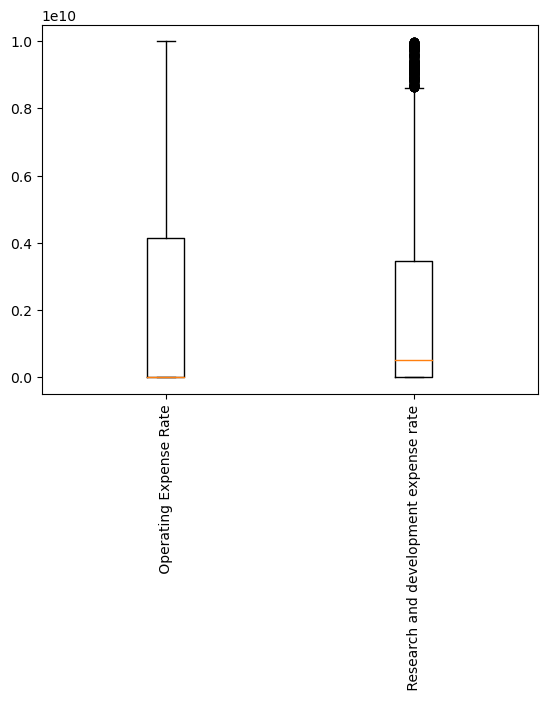

In [16]:
plt.boxplot(data)
pylab.xticks([1,2], BoxName,rotation=90)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd84e6bed40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd84e6bf280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd84e6beaa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd84e6bf7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd84e6bfa60>],
 'means': []}

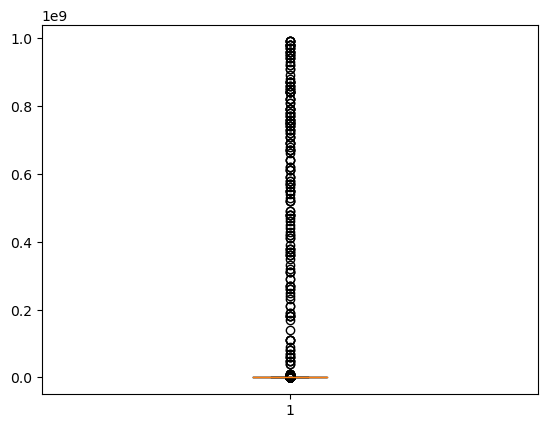

In [17]:
plt.boxplot(df[' Interest-bearing debt interest rate'])

In [18]:
BoxName = [' Cash flow rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
          ' Cash Flow Per Share',]

In [19]:
data = [df[' Cash flow rate'], df[' Tax rate (A)'],
       df[' Net Value Per Share (B)'], df[' Net Value Per Share (A)'],
       df[' Net Value Per Share (C)'], df[' Persistent EPS in the Last Four Seasons'],
       df[' Cash Flow Per Share']]

([<matplotlib.axis.XTick at 0x7fd84e4eeaa0>,
 [Text(1, 0, ' Cash flow rate'),
  Text(2, 0, ' Tax rate (A)'),
  Text(3, 0, ' Net Value Per Share (B)'),
  Text(4, 0, ' Net Value Per Share (A)'),
  Text(5, 0, ' Net Value Per Share (C)'),
  Text(6, 0, ' Persistent EPS in the Last Four Seasons'),
  Text(7, 0, ' Cash Flow Per Share')])

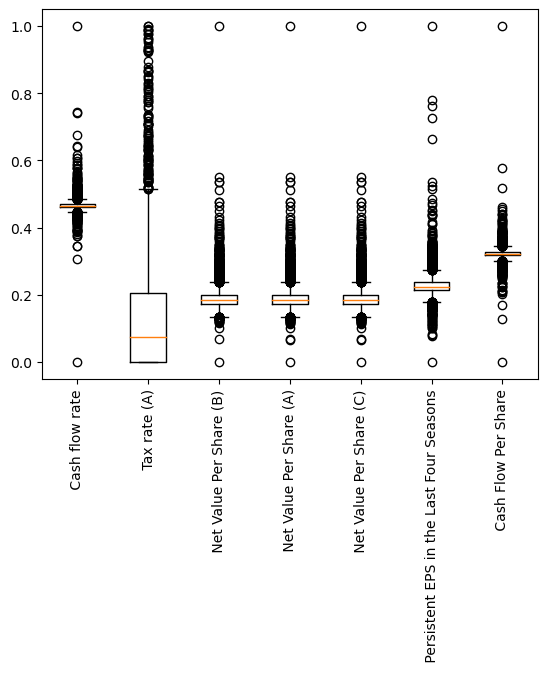

In [20]:
plt.boxplot(data)
pylab.xticks([1,2,3,4,5,6,7], BoxName,rotation=90)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd84ecd4a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd84ecd4f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd84ecd4790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd84ecd54b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd84ecd56f0>],
 'means': []}

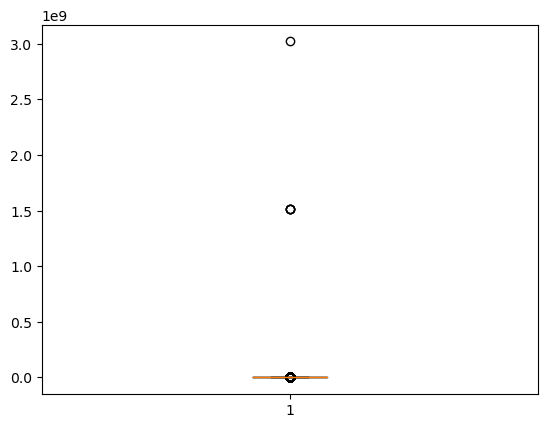

In [21]:
plt.boxplot(df[' Revenue Per Share (Yuan ¥)'])

([<matplotlib.axis.XTick at 0x7fd84ed18970>,
 [Text(1, 0, ' Operating Profit Per Share (Yuan ¥)'),
  Text(2, 0, ' Per Share Net profit before tax (Yuan ¥)')])

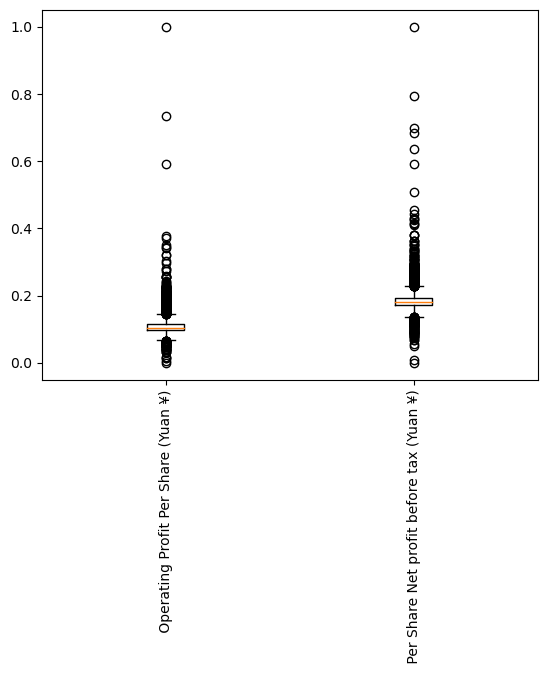

In [22]:
BoxName = [
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)']

data = [
       df[' Operating Profit Per Share (Yuan ¥)'],
       df[' Per Share Net profit before tax (Yuan ¥)']]


plt.boxplot(data)
pylab.xticks([1,2], BoxName,rotation=90)

([<matplotlib.axis.XTick at 0x7fd84efe1480>,
 [Text(1, 0, ' Realized Sales Gross Profit Growth Rate'),
  Text(2, 0, ' Operating Profit Growth Rate'),
  Text(3, 0, ' After-tax Net Profit Growth Rate'),
  Text(4, 0, ' Regular Net Profit Growth Rate'),
  Text(5, 0, ' Continuous Net Profit Growth Rate'),
  Text(6, 0, ' Total Asset Return Growth Rate Ratio')])

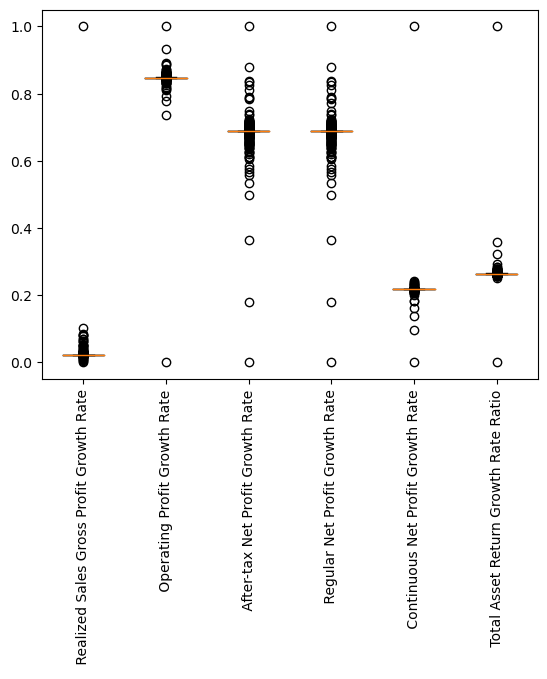

In [23]:
BoxName = [' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Return Growth Rate Ratio'
          ]

data = [df[' Realized Sales Gross Profit Growth Rate'],
       df[' Operating Profit Growth Rate'], df[' After-tax Net Profit Growth Rate'],
       df[' Regular Net Profit Growth Rate'], df[' Continuous Net Profit Growth Rate'],
       df[' Total Asset Return Growth Rate Ratio']]

plt.boxplot(data)
pylab.xticks([1,2,3,4,5,6], BoxName,rotation=90)

([<matplotlib.axis.XTick at 0x7fd84f6c1150>,
 [Text(1, 0, ' Regular Net Profit Growth Rate'),
  Text(2, 0, ' Continuous Net Profit Growth Rate')])

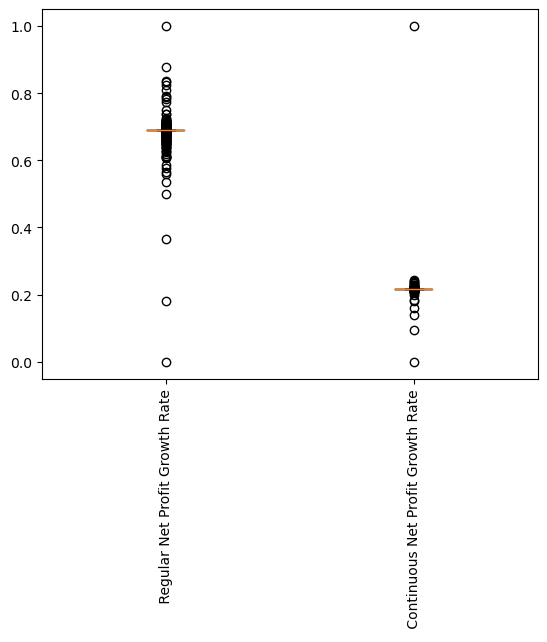

In [24]:
BoxName = [
       ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate'
          ]

data = [
       df[' Regular Net Profit Growth Rate'], df[' Continuous Net Profit Growth Rate'],
]

plt.boxplot(data)
pylab.xticks([1,2], BoxName,rotation=90)

([<matplotlib.axis.XTick at 0x7fd84f73e4d0>,
 [Text(1, 0, ' Cash Reinvestment %'),
  Text(2, 0, ' Current Ratio'),
  Text(3, 0, ' Quick Ratio'),
  Text(4, 0, ' Interest Expense Ratio'),
  Text(5, 0, ' Total debt/Total net worth'),
  Text(6, 0, ' Debt ratio %'),
  Text(7, 0, ' Net worth/Assets'),
  Text(8, 0, ' Long-term fund suitability ratio (A)')])

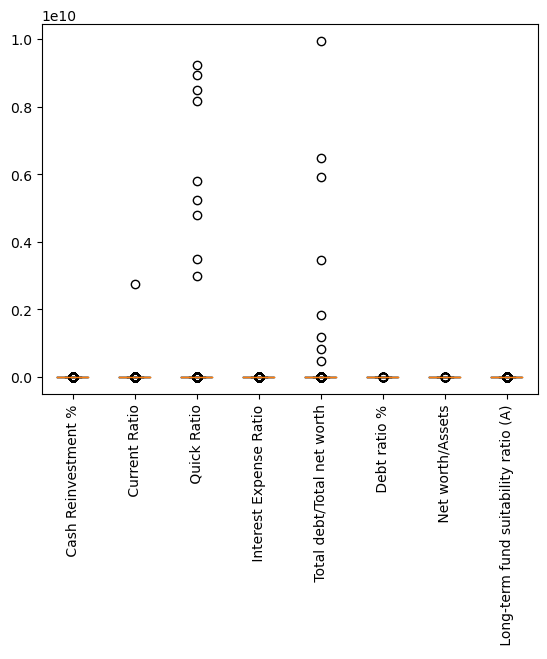

In [25]:
BoxName = [' Cash Reinvestment %',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Long-term fund suitability ratio (A)'
          ]

data = [df[' Cash Reinvestment %'],
       df[' Current Ratio'], df[' Quick Ratio'], df[' Interest Expense Ratio'],
       df[' Total debt/Total net worth'], df[' Debt ratio %'], df[' Net worth/Assets'],
       df[' Long-term fund suitability ratio (A)']]

plt.boxplot(data)
pylab.xticks([1,2,3,4,5,6,7,8], BoxName,rotation=90)

etc.

In [26]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

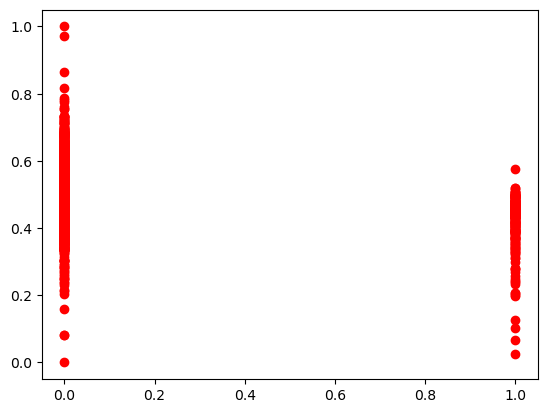

In [27]:
plt.plot(df['Bankrupt?'], df[' ROA(C) before interest and depreciation before interest'], 'ro')

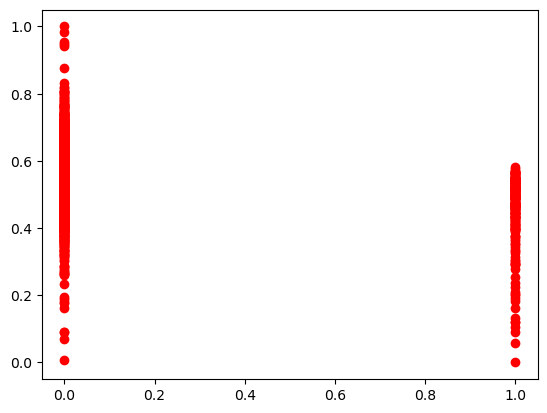

In [28]:
plt.plot(df['Bankrupt?'], df[' ROA(A) before interest and % after tax'], 'ro')

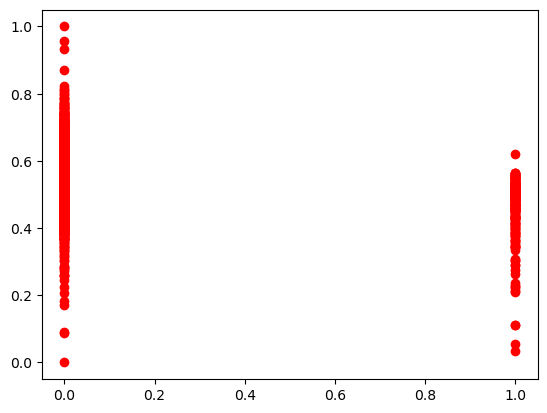

In [29]:
plt.plot(df['Bankrupt?'], df[' ROA(B) before interest and depreciation after tax'], 'ro')

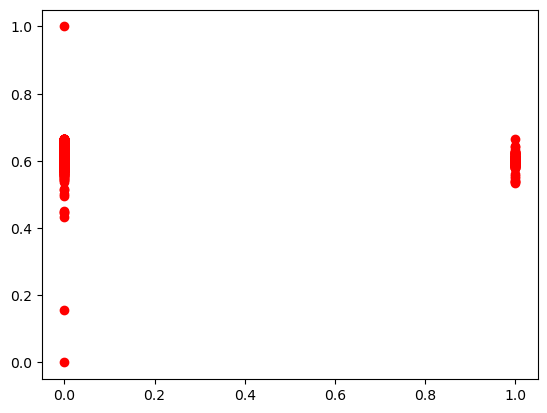

In [30]:
plt.plot(df['Bankrupt?'], df[' Operating Gross Margin'], 'ro')

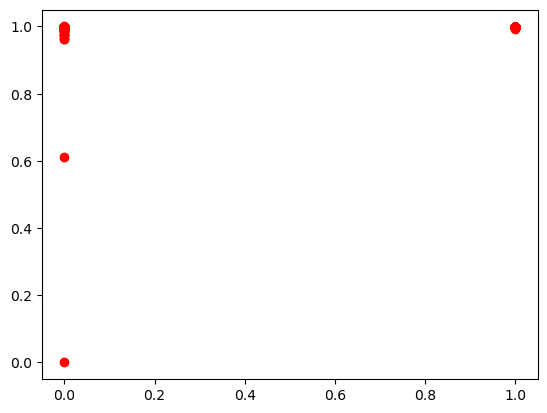

In [31]:
plt.plot(df['Bankrupt?'], df[' Operating Profit Rate'], 'ro')

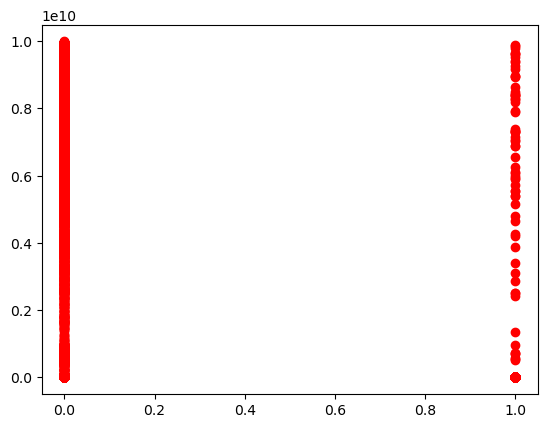

In [32]:
plt.plot(df['Bankrupt?'], df[' Operating Expense Rate'], 'ro')

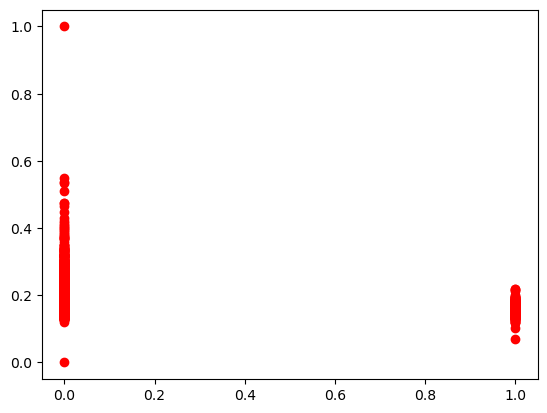

In [33]:
plt.plot(df['Bankrupt?'], df[' Net Value Per Share (B)'], 'ro')

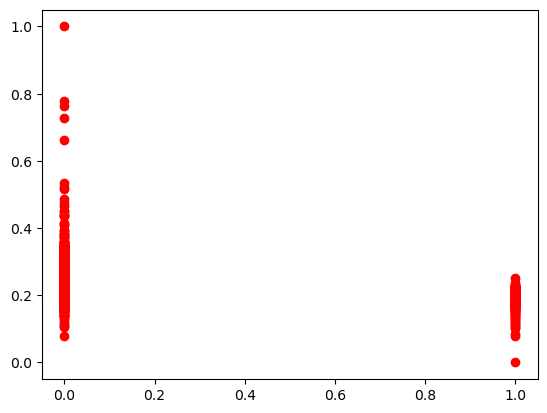

In [34]:
plt.plot(df['Bankrupt?'], df[' Persistent EPS in the Last Four Seasons'], 'ro')

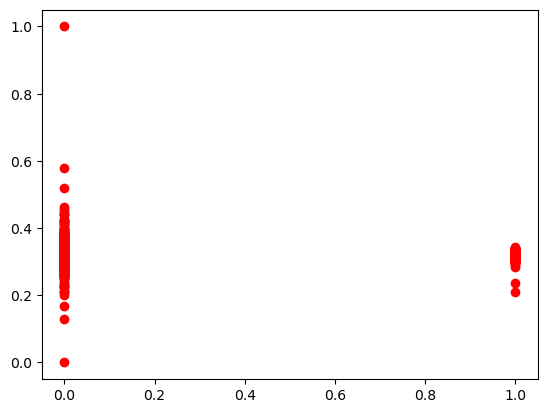

In [35]:
plt.plot(df['Bankrupt?'], df[' Cash Flow Per Share'], 'ro')

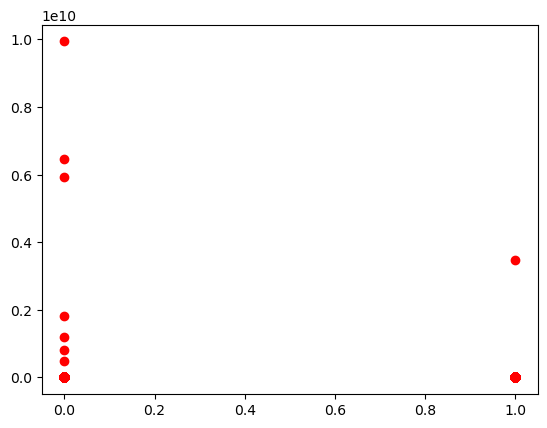

In [36]:
plt.plot(df['Bankrupt?'], df[' Total debt/Total net worth'], 'ro')

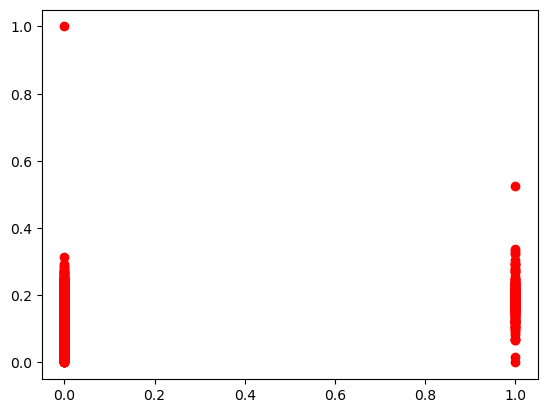

In [37]:
plt.plot(df['Bankrupt?'], df[' Debt ratio %'], 'ro')

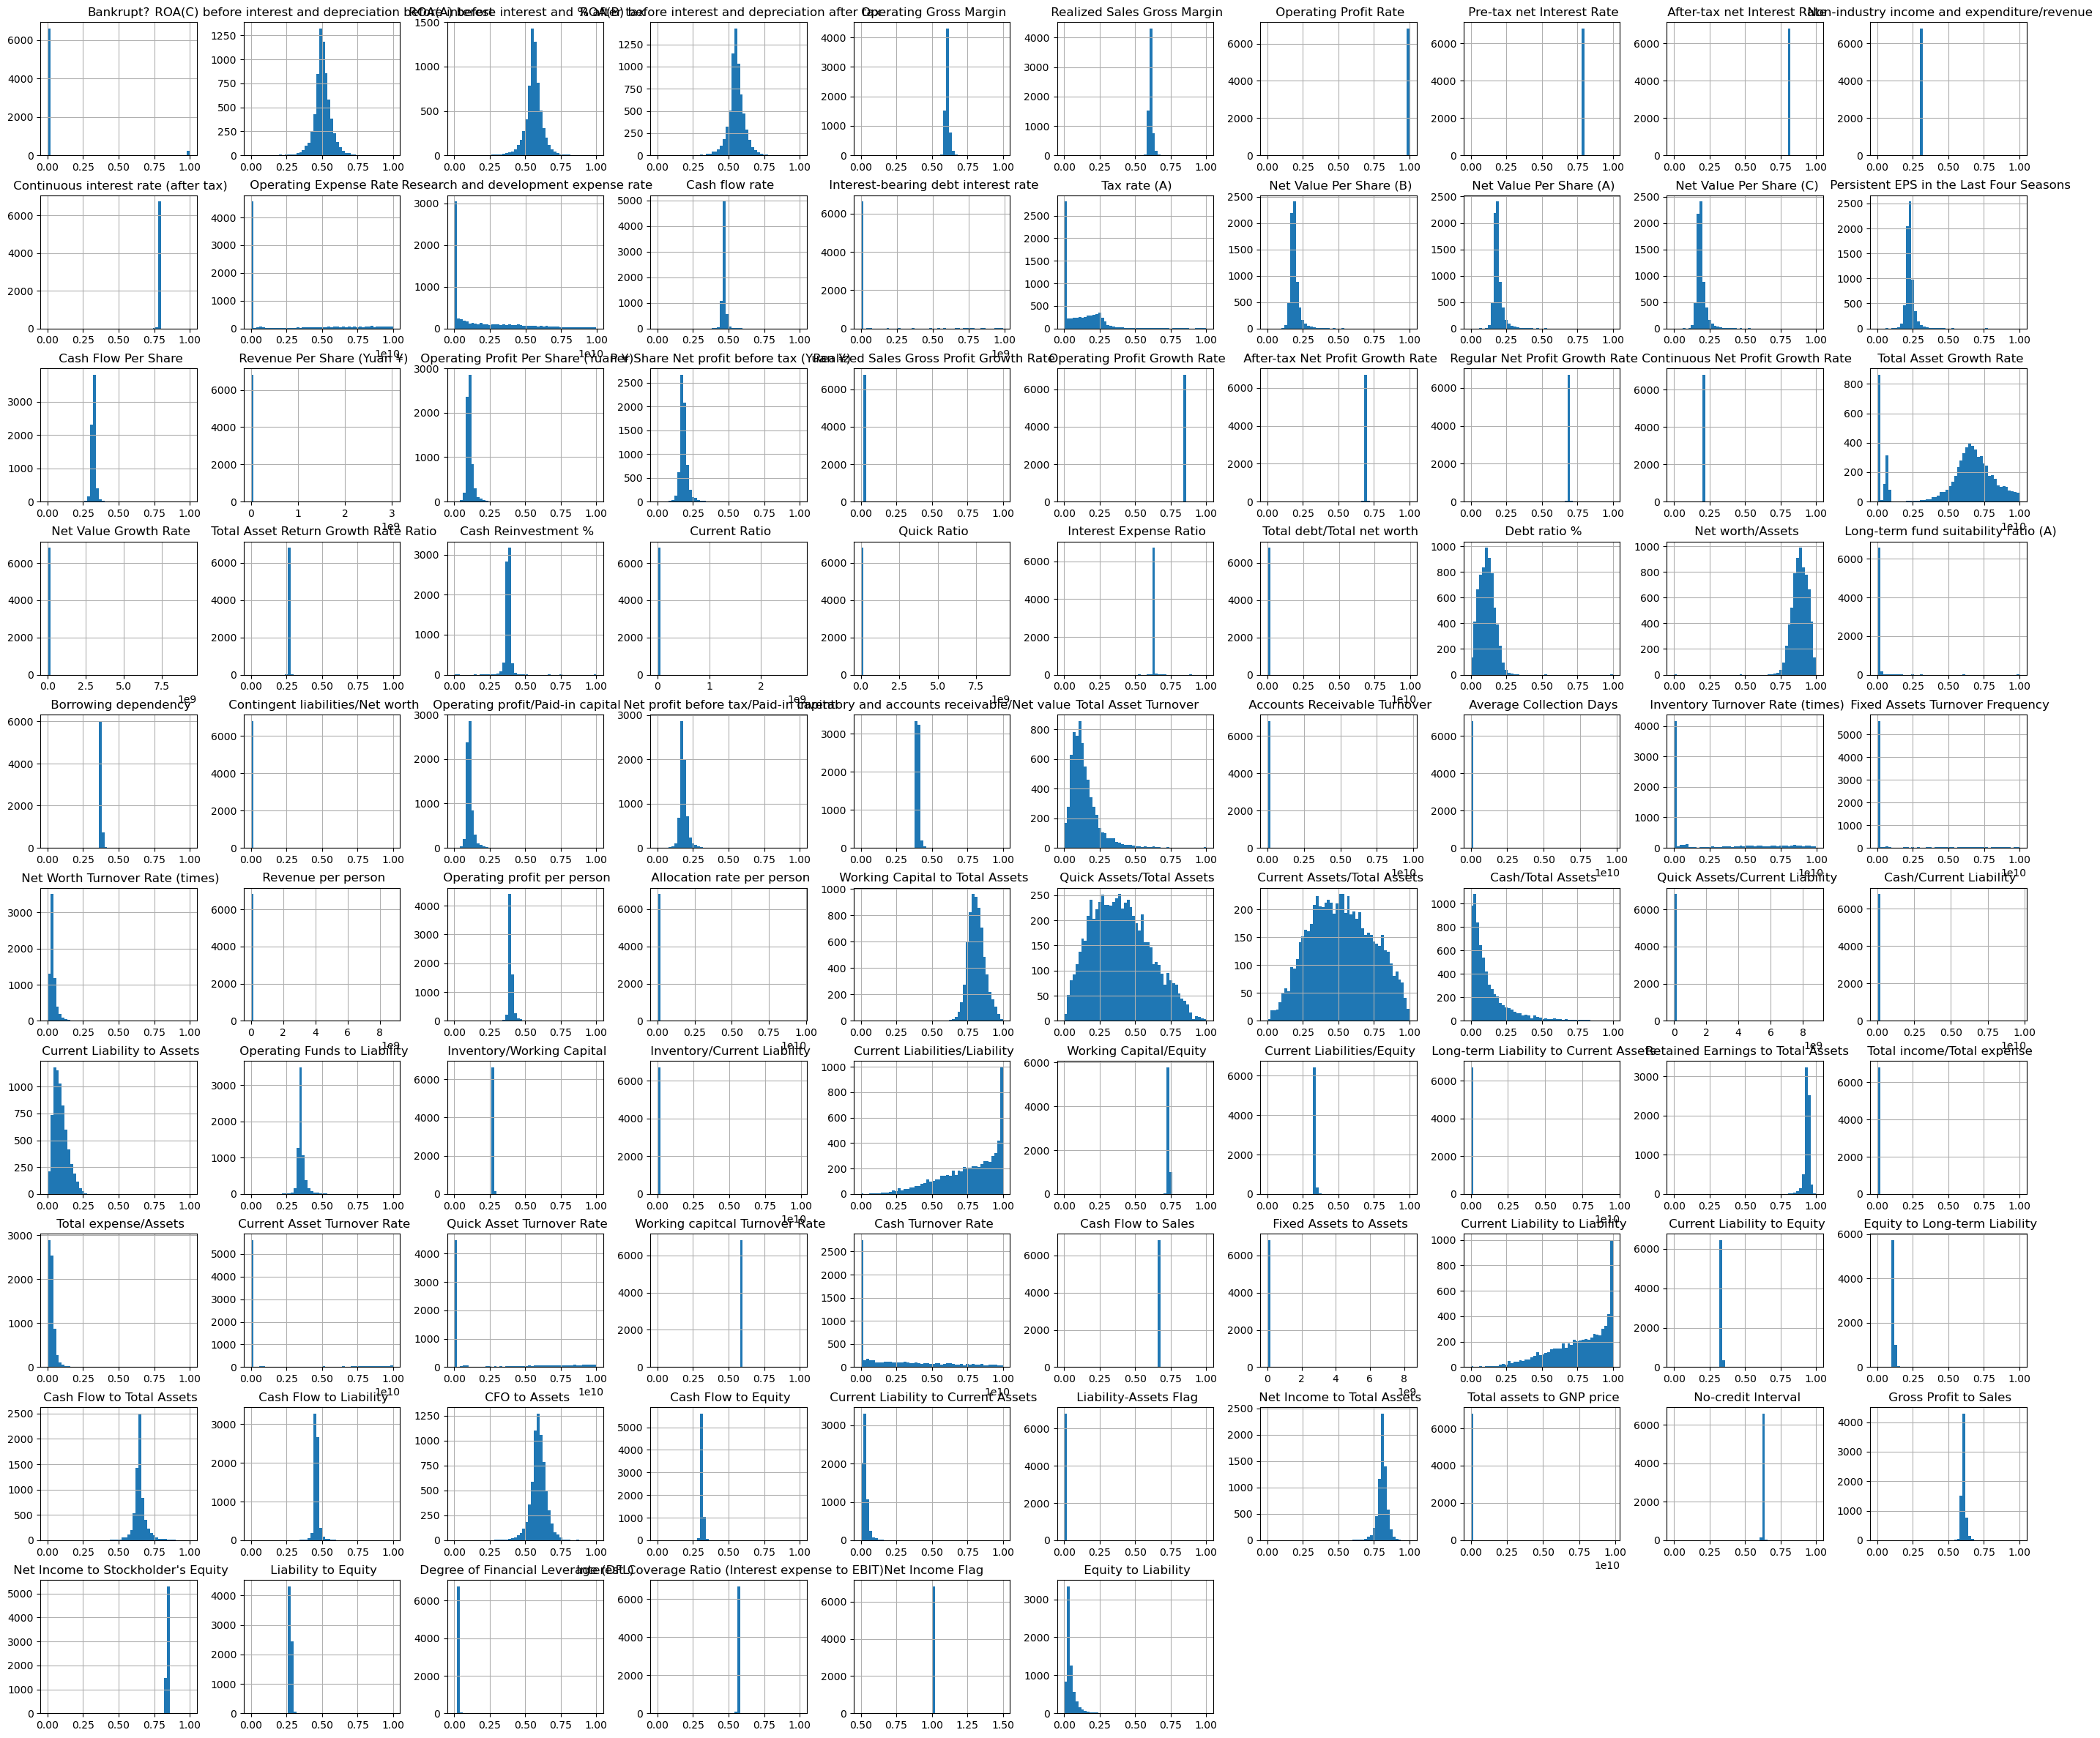

In [38]:
# Looking at the histograms of numerical data

df.hist(figsize = (35,30), bins = 50)
plt.show()

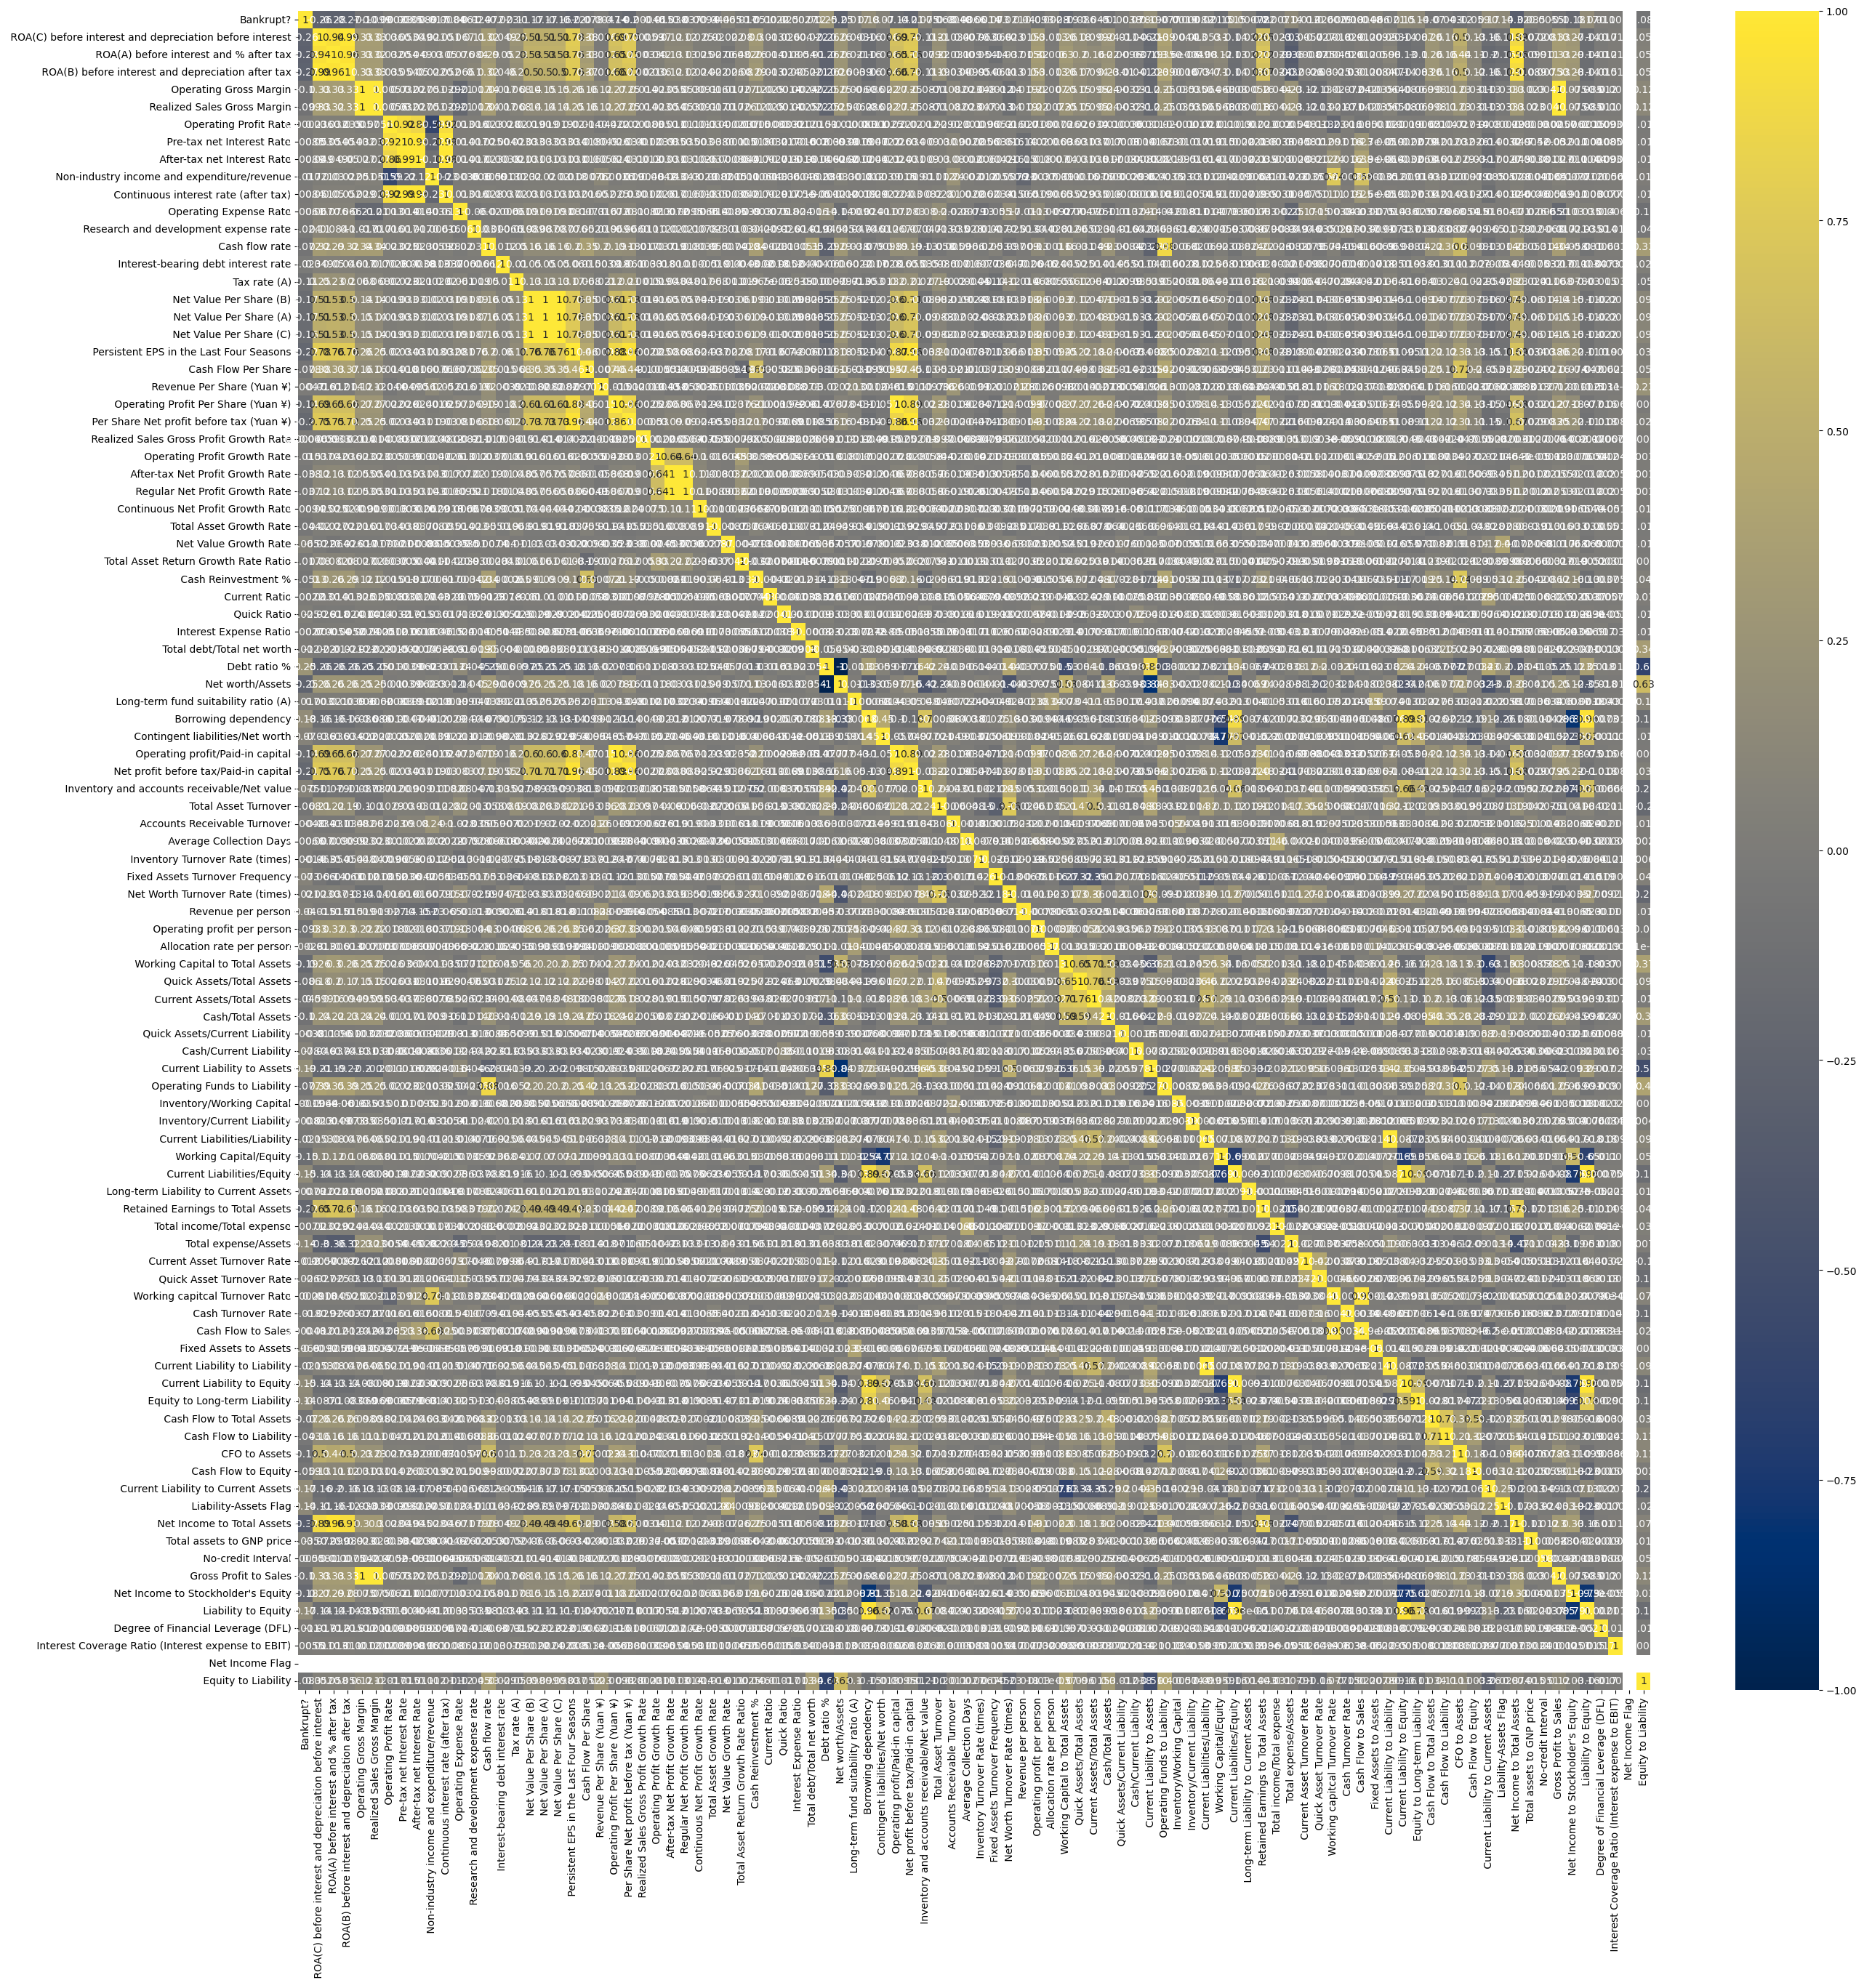

In [39]:
#on va faire la matrice de corrélation pour cross check nos observations avec les scatterplots
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,30))
corr = df.corr()
sns.heatmap(corr, cmap = 'cividis', annot = True)
plt.show()

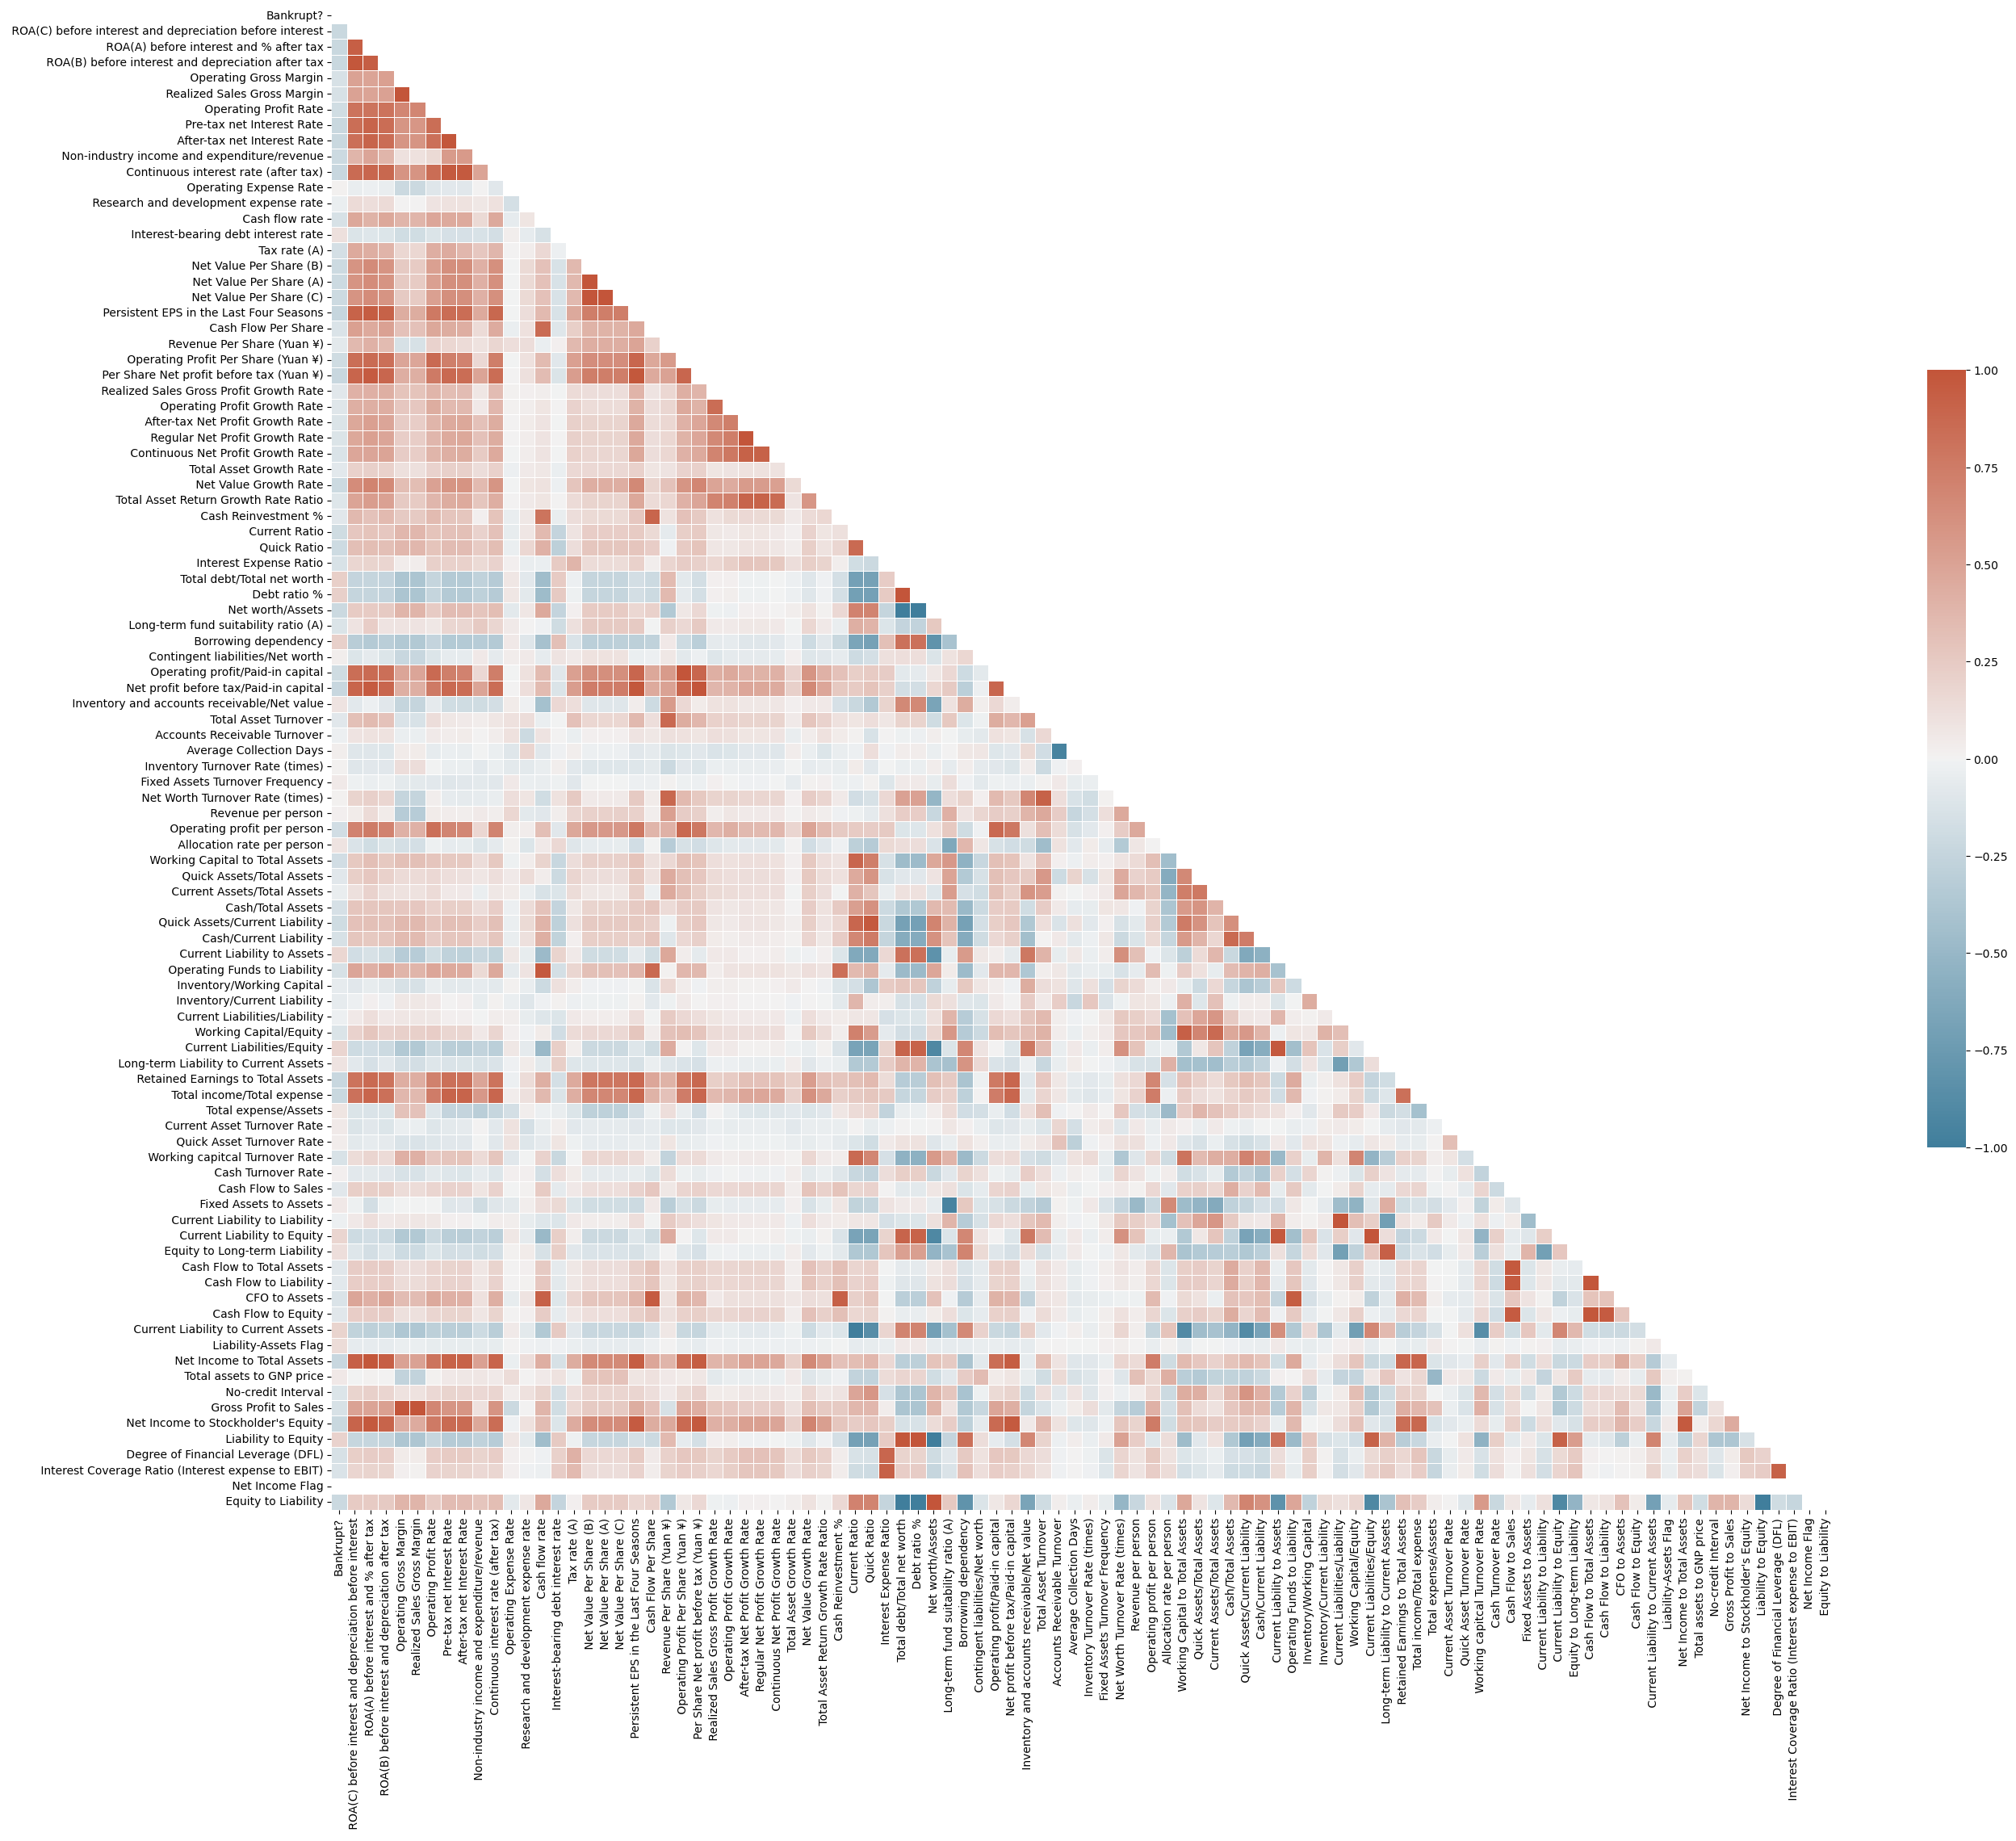

In [40]:
f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

On va plotter les valeurs qui ont la plus gross correl

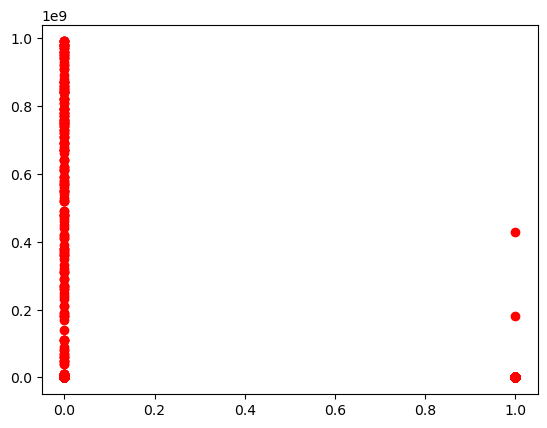

In [41]:
plt.plot(df['Bankrupt?'], df[' Interest-bearing debt interest rate'], 'ro')

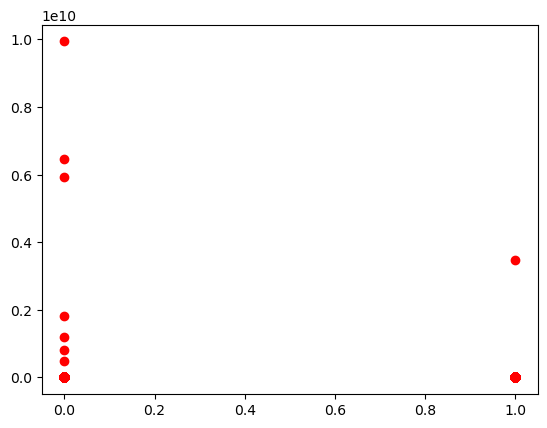

In [42]:
plt.plot(df['Bankrupt?'], df[' Total debt/Total net worth'], 'ro')

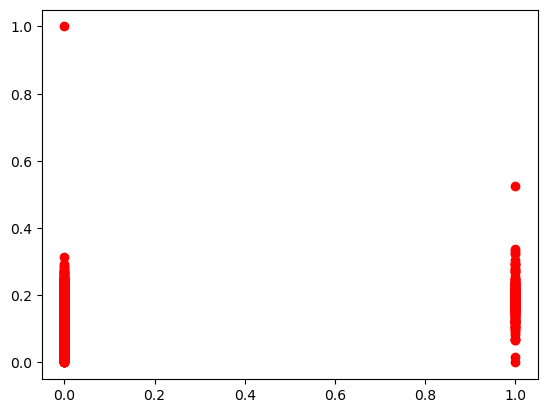

In [43]:
plt.plot(df['Bankrupt?'], df[' Debt ratio %'], 'ro')

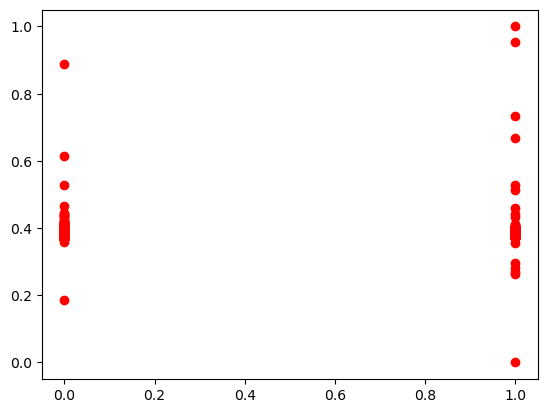

In [44]:
plt.plot(df['Bankrupt?'], df[' Borrowing dependency'], 'ro')

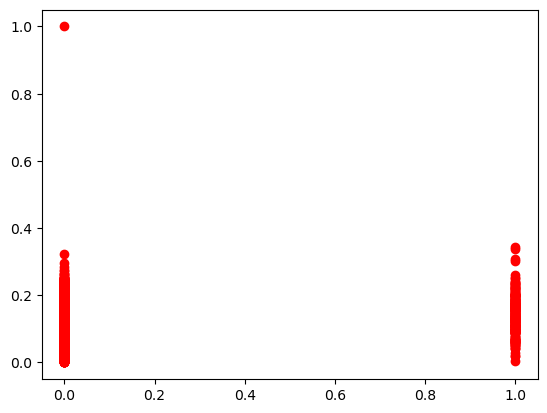

In [45]:
plt.plot(df['Bankrupt?'], df[' Current Liability to Assets'], 'ro')

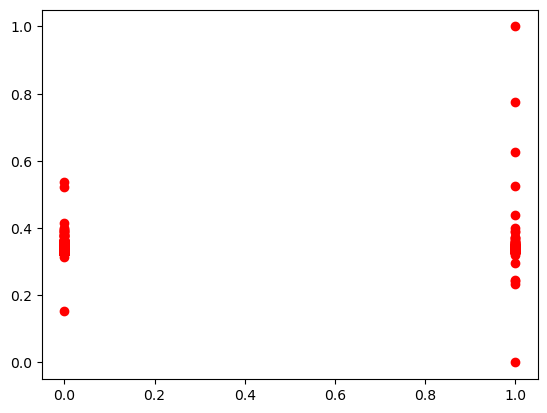

In [46]:
plt.plot(df['Bankrupt?'], df[' Current Liability to Equity'], 'ro')

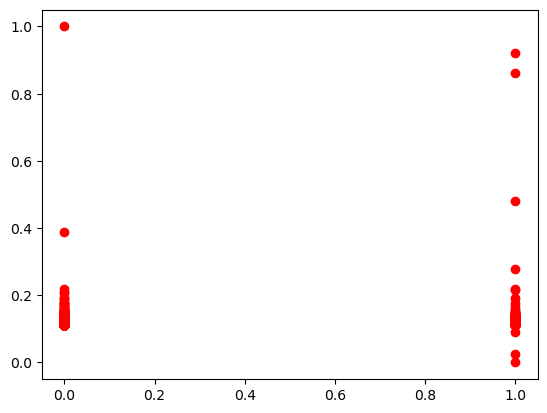

In [47]:
plt.plot(df['Bankrupt?'], df[' Equity to Long-term Liability'], 'ro')

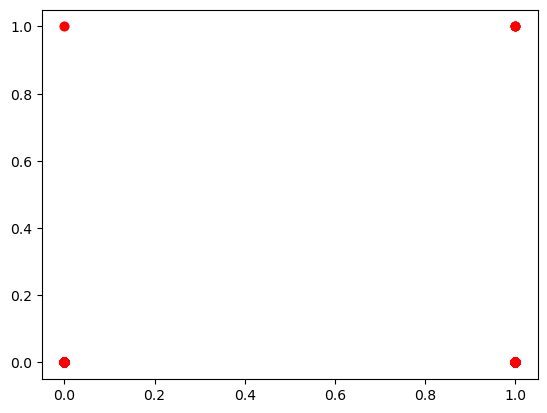

In [48]:
plt.plot(df['Bankrupt?'], df[' Liability-Assets Flag'], 'ro')

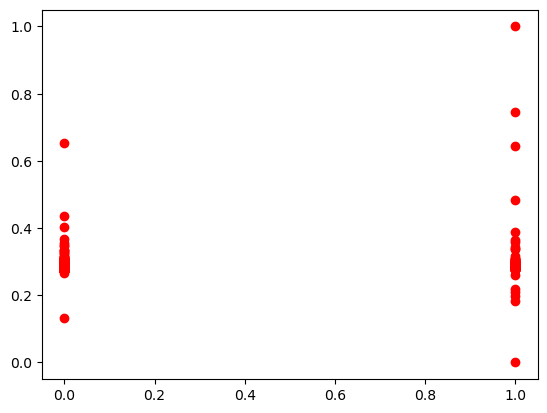

In [49]:
plt.plot(df['Bankrupt?'], df[' Liability to Equity'], 'ro')

([<matplotlib.axis.XTick at 0x7fd835494220>,
 [Text(1, 0, ' Interest-bearing debt interest rate'),
  Text(2, 0, ' Total debt/Total net worth'),
  Text(3, 0, ' Debt ratio %'),
  Text(4, 0, ' Borrowing dependency'),
  Text(5, 0, ' Current Liability to Equity'),
  Text(6, 0, ' Equity to Long-term Liability'),
  Text(7, 0, ' Liability-Assets Flag'),
  Text(8, 0, ' Liability to Equity')])

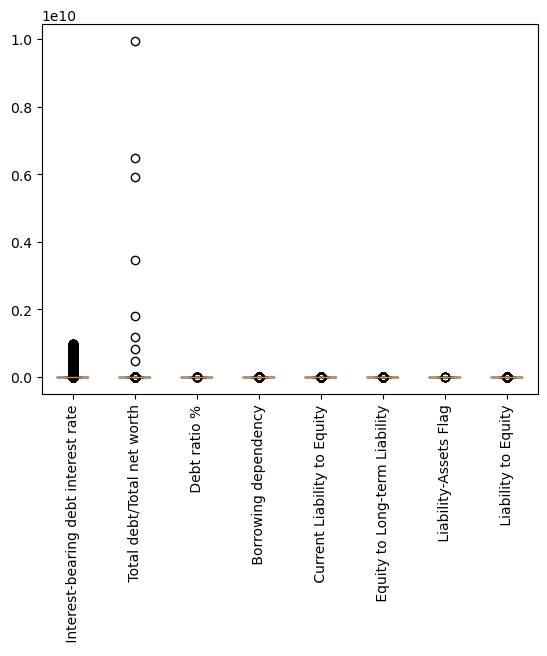

In [50]:
BoxName = [' Interest-bearing debt interest rate',
       ' Total debt/Total net worth', ' Debt ratio %', ' Borrowing dependency',
       ' Current Liability to Equity', ' Equity to Long-term Liability', ' Liability-Assets Flag',
       ' Liability to Equity'
          ]

data = [df[' Interest-bearing debt interest rate'],
       df[' Total debt/Total net worth'], df[' Debt ratio %'], df[' Borrowing dependency'],
       df[' Current Liability to Equity'], df[' Equity to Long-term Liability'], df[' Liability-Assets Flag'],
       df[' Liability to Equity']]

plt.boxplot(data)
pylab.xticks([1,2,3,4,5,6,7,8], BoxName,rotation=90)

([<matplotlib.axis.XTick at 0x7fd835c0d960>,
 [Text(1, 0, ' Debt ratio %'),
  Text(2, 0, ' Borrowing dependency'),
  Text(3, 0, ' Current Liability to Equity'),
  Text(4, 0, ' Equity to Long-term Liability'),
  Text(5, 0, ' Liability-Assets Flag'),
  Text(6, 0, ' Liability to Equity')])

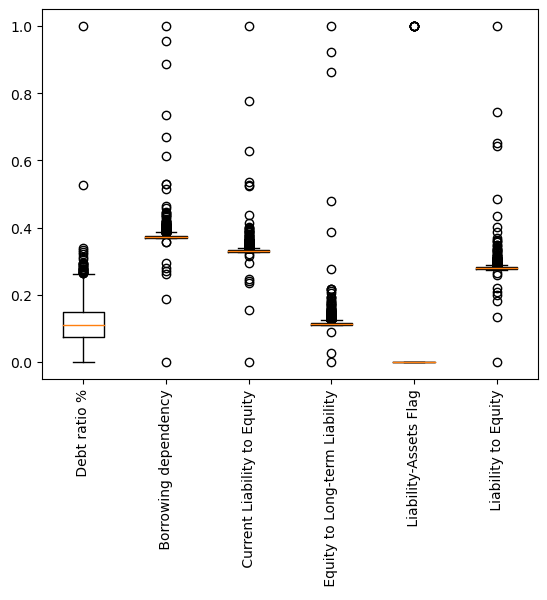

In [51]:
BoxName = [ ' Debt ratio %', ' Borrowing dependency',
       ' Current Liability to Equity', ' Equity to Long-term Liability', ' Liability-Assets Flag',
       ' Liability to Equity'
          ]

data = [ df[' Debt ratio %'], df[' Borrowing dependency'],
       df[' Current Liability to Equity'], df[' Equity to Long-term Liability'], df[' Liability-Assets Flag'],
       df[' Liability to Equity']]

plt.boxplot(data)
pylab.xticks([1,2,3,4,5,6], BoxName,rotation=90)

### ML part

On va diviser set entre un training set et test set

Tout d'abord on va shortlist les features qui semblent les plus pertinentes.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [53]:
new_df = df.iloc[:,[0,14,36,37,40,79,85,91]]

In [54]:
new_df

Bankrupt?   Interest-bearing debt interest rate  \
0             1                          7.250725e-04   
1             1                          6.470647e-04   
2             1                          7.900790e-04   
3             1                          4.490449e-04   
4             1                          6.860686e-04   
...         ...                                   ...   
6814          0                          1.790179e-04   
6815          0                          2.370237e-04   
6816          0                          0.000000e+00   
6817          0                          2.110211e-04   
6818          0                          5.900000e+08   

       Total debt/Total net worth   Debt ratio %   Borrowing dependency  \
0                        0.021266       0.207576               0.390284   
1                        0.012502       0.171176               0.376760   
2                        0.021248       0.207516               0.379093   
3                        0.009572       0.151465               0.379743   
4                        0.005150       0.106509               0.375025   
...                           ...            ...                    ...   
6814                     0.006655       0.124618               0.373823   
6815                     0.004623       0.099253               0.372505   
6816                     0.001392       0.038939               0.369637   
6817                     0.003816       0.086979               0.369649   
6818                     0.000461       0.014149               0.370049   

       Equity to Long-term Liability   Liability-Assets Flag  \
0                           0.126549                       0   
1                           0.120916                       0   
2                           0.117922                       0   
3                           0.120760                       0   
4                           0.110933                       0   
...                              ...                     ...   
6814                        0.112622                       0   
6815                        0.112329                       0   
6816                        0.110933                       0   
6817                        0.110957                       0   
6818                        0.110933                       0   

       Liability to Equity  
0                 0.290202  
1                 0.283846  
2                 0.290189  
3                 0.281721  
4                 0.278514  
...                    ...  
6814              0.279606  
6815              0.278132  
6816              0.275789  
6817              0.277547  
6818              0.275114  

[6819 rows x 8 columns]

### Linear Regression

In [55]:
#extract x and y from our data
x=df[" Interest-bearing debt interest rate"].values[:,np.newaxis]
# y est loutput
y=df['Bankrupt?'].values

#test_size c'est le % de données de test = 30% et donc train c'est 70%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40,shuffle = True) #splitting data with test size of 30%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

print('the coeff "a" of the regression is {}'.format(model.coef_))
print('the intercept "b" of the regression is {}'.format(model.intercept_))

MSE 0.03302992449614298
R squared 0.0003824796696352273
the coeff "a" of the regression is [-3.39044673e-11]
the intercept "b" of the regression is 0.032037808984135475


-> mauvais résultat du R squared =  underfitting

In [56]:
#extract x and y from our data
x=df[" Total debt/Total net worth"].values[:,np.newaxis]
# y est loutput
y=df['Bankrupt?'].values

#test_size c'est le % de données de test = 30% et donc train c'est 70%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40,  shuffle=True) #splitting data with test size of 30%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

print('the coeff "a" of the regression is {}'.format(model.coef_))
print('the intercept "b" of the regression is {}'.format(model.intercept_))

MSE 0.03305117601642581
R squared -0.0002606762664567608
the coeff "a" of the regression is [1.32336756e-11]
the intercept "b" of the regression is 0.03134555472601053


In [57]:
#extract x and y from our data
x=df[" Debt ratio %"].values[:,np.newaxis]
# y est loutput
y=df['Bankrupt?'].values

#test_size c'est le % de données de test = 30% et donc train c'est 70%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40,  shuffle=True) #splitting data with test size of 30%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

print('the coeff "a" of the regression is {}'.format(model.coef_))
print('the intercept "b" of the regression is {}'.format(model.intercept_))

MSE 0.030751489798938415
R squared 0.06933701943917836
the coeff "a" of the regression is [0.77329694]
the intercept "b" of the regression is -0.0558928577634828


In [58]:
#extract x and y from our data
x=df[" Borrowing dependency"].values[:,np.newaxis]
# y est loutput
y=df['Bankrupt?'].values

#test_size c'est le % de données de test = 30% et donc train c'est 70%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40,  shuffle=True) #splitting data with test size of 30%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

print('the coeff "a" of the regression is {}'.format(model.coef_))
print('the intercept "b" of the regression is {}'.format(model.intercept_))

MSE 0.031966146628787405
R squared 0.03257664935574778
the coeff "a" of the regression is [1.65800648]
the intercept "b" of the regression is -0.5898567429200584


In [59]:
#extract x and y from our data
x=df[" Equity to Long-term Liability"].values[:,np.newaxis]
# y est loutput
y=df['Bankrupt?'].values

#test_size c'est le % de données de test = 30% et donc train c'est 70%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40,  shuffle=True) #splitting data with test size of 30%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

print('the coeff "a" of the regression is {}'.format(model.coef_))
print('the intercept "b" of the regression is {}'.format(model.intercept_))

MSE 0.03232623789456579
R squared 0.021678848537824424
the coeff "a" of the regression is [1.05080781]
the intercept "b" of the regression is -0.09013199790456666


In [60]:
#extract x and y from our data
x=df[" Liability-Assets Flag"].values[:,np.newaxis]
# y est loutput
y=df['Bankrupt?'].values

#test_size c'est le % de données de test = 30% et donc train c'est 70%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40,  shuffle=True) #splitting data with test size of 30%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

print('the coeff "a" of the regression is {}'.format(model.coef_))
print('the intercept "b" of the regression is {}'.format(model.intercept_))

MSE 0.03295003242496012
R squared 0.0028003330346709765
the coeff "a" of the regression is [0.80291588]
the intercept "b" of the regression is 0.03041745332494231


In [61]:
#extract x and y from our data
x=df[" Liability to Equity"].values[:,np.newaxis]
# y est loutput
y=df['Bankrupt?'].values

#test_size c'est le % de données de test = 30% et donc train c'est 70%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40,  shuffle=True) #splitting data with test size of 30%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

print('the coeff "a" of the regression is {}'.format(model.coef_))
print('the intercept "b" of the regression is {}'.format(model.intercept_))

MSE 0.03210652477622202
R squared 0.02832824558892877
the coeff "a" of the regression is [1.73220437]
the intercept "b" of the regression is -0.4543457835756171


On va essayer de faire une régression multilinéaire avec les features qui ont eu les R squared les plus élevés à savoir:
df[" Debt ratio %"]
df[" Borrowing dependency"]
df[" Equity to Long-term Liability"]
df[" Liability to Equity"]

### Multilinear regression

In [62]:
#extract x and y from our data
x=df[[" Debt ratio %"," Borrowing dependency"," Liability to Equity"]]  #we have more than one input
y=df['Bankrupt?'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40, shuffle = True) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

print('the coeff "a" of the regression is {}'.format(model.coef_))
print('the intercept "b" of the regression is {}'.format(model.intercept_))

MSE 0.0296153842248204
R squared 0.07453646008780279
the coeff "a" of the regression is [ 0.67393773  1.86251156 -0.89298606]
the intercept "b" of the regression is -0.4921680529080621


Test de l'algorithme avec le paramètre stratify: Le paramètre Stratify choisit si les données sont séparées de façon à garder les mêmes proportions d’observations dans chaque classe dans les ensembles train et test que dans le dataset initial.

Ce paramètre est particulièrement utile face à des données « unbalanced » avec des proportions très déséquilibrées entre les différentes classes.

In [105]:
#extract x and y from our data
x=df[" Debt ratio %"].values[:,np.newaxis]
# y est loutput
y=df['Bankrupt?'].values

#test_size c'est le % de données de test = 30% et donc train c'est 70%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=20,  shuffle=True, stratify=y) #splitting data with test size of 30%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

print('the coeff "a" of the regression is {}'.format(model.coef_))
print('the intercept "b" of the regression is {}'.format(model.intercept_))

MSE 0.029074934117856183
R squared 0.0686329437580071
the coeff "a" of the regression is [0.796576]
the intercept "b" of the regression is -0.057981855469849485


### deal with unbalanced data

Pour rappel notre dataset est unbalanced. Autrement dit, il y a peu de valeurs qui ont 1 et beaucoup qui ont 0 pour la colonne (Bankrupt?)

In [64]:
from sklearn.utils.class_weight import compute_sample_weight
#y=df['Bankrupt?'].values
sample_weights = compute_sample_weight(class_weight = 'balanced', y = y_train)

In [65]:
sample_weights

array([0.51667027, 0.51667027, 0.51667027, ..., 0.51667027, 0.51667027,
       0.51667027])

In [103]:
#extract x and y from our data
x=df[" Debt ratio %"].values[:,np.newaxis]
# y est loutput
y=df['Bankrupt?'].values
sample_weights = compute_sample_weight(class_weight = 'balanced', y = y_train)

#test_size c'est le % de données de test = 30% et donc train c'est 70%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40, shuffle = True) #splitting data with test size of 30%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train, sample_weight=sample_weights)  #fitting the training data WITH SAMPLE WEIGHTS
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

print('the coeff "a" of the regression is {}'.format(model.coef_))
print('the intercept "b" of the regression is {}'.format(model.intercept_))

ValueError: sample_weight.shape == (5455,), expected (4773,)!

Conclusion : le fait de rebalancer mes résultats a dégradé la pertinence de mon algorithme.

### Test regression polynomiale

#### On teste d'abord sur une seule variable

In [67]:
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics
x=df[" Debt ratio %"].values[:,np.newaxis]
y=df['Bankrupt?'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40, shuffle = True)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
#on rajoute l'underscore pour la transformation polynomiale
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))
print('the coeff "a" of the regression is {}'.format(model.coef_))
print('the intercept "b" of the regression is {}'.format(model.intercept_))

MSE:  0.029575418086292642
R squared:  0.1049296496694695
the coeff "a" of the regression is [0.32274701]
the intercept "b" of the regression is -0.011446078303388518


#### On teste maintenant sur plusieurs variables

In [68]:
x=df[[" Debt ratio %"," Borrowing dependency"," Liability to Equity"]]
y=df['Bankrupt?'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40, shuffle = True)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
#on rajoute l'underscore pour la transformation polynomiale
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  0.030326849411634316
R squared:  0.08218833464695652


### on va tester un autre algorithme de machine learning : logistic regression

This algo will be better suited for our problem as the output variable is categorical

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

#features extraction
x = df[[" Debt ratio %"," Borrowing dependency"," Liability to Equity"," Liability-Assets Flag"]]
y = df['Bankrupt?']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=40)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Validation Accuracy : {accuracy * 100:.2f}%')

Validation Accuracy : 96.41%


<Axes: xlabel='Predicted', ylabel='Actual'>

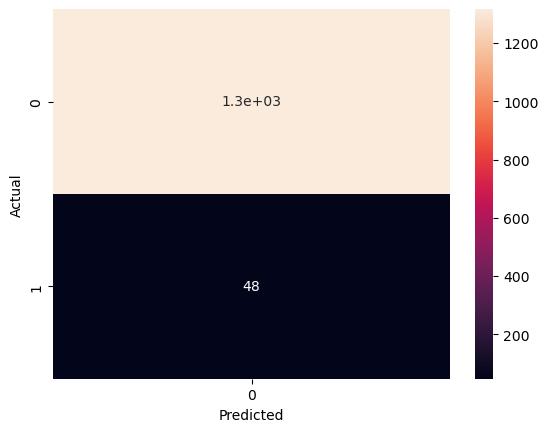

In [100]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

on voit qu'il n'y a aucune donnée avec des entreprises qui ont fait faillite dans le test.
on va devoir dupliquer le nombre de données

In [71]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

On va retester l'algorithme en dupliquant les données

In [72]:
dfduplicated = pd.read_csv(r'/Users/guillaume/Desktop/GoMycode/Intelligence Artificielle/FichiersCsv/DataFrameBankruptDuplicated.csv',sep=';')

In [73]:
dfduplicated.drop('Unnamed: 0',axis=1,inplace=True)

In [74]:
dfduplicated['Bankrupt?'].value_counts()

0    6599
1    1760
Name: Bankrupt?, dtype: int64

In [75]:
#features extraction
x = dfduplicated[[" Debt ratio %"," Borrowing dependency"," Liability to Equity"," Liability-Assets Flag"]]
y = dfduplicated['Bankrupt?']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=20, shuffle=True)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Validation Accuracy : {accuracy * 100:.2f}%')

Validation Accuracy : 82.12%


<Axes: xlabel='Predicted', ylabel='Actual'>

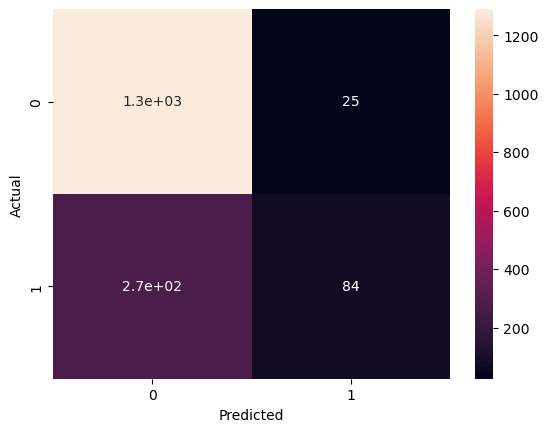

In [76]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.90      1314
           1       0.77      0.23      0.36       358

    accuracy                           0.82      1672
   macro avg       0.80      0.61      0.63      1672
weighted avg       0.81      0.82      0.78      1672



### Algo KNN neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
#features extraction
x = dfduplicated[[" Debt ratio %"," Borrowing dependency"," Liability to Equity"," Liability-Assets Flag"]]
y = dfduplicated['Bankrupt?']

# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=40)

In [85]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [86]:
#build our knn classifier
knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Accuracy=',accuracy_score(y_pred,y_test))

Accuracy= 0.9196172248803828


In [87]:
n_neighbors=50
scores=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))  

Accuracy for k= 1 is: 0.84
Accuracy for k= 2 is: 0.84
Accuracy for k= 3 is: 0.85
Accuracy for k= 4 is: 0.85
Accuracy for k= 5 is: 0.85
Accuracy for k= 6 is: 0.85
Accuracy for k= 7 is: 0.85
Accuracy for k= 8 is: 0.85
Accuracy for k= 9 is: 0.85
Accuracy for k= 10 is: 0.84
Accuracy for k= 11 is: 0.84
Accuracy for k= 12 is: 0.84
Accuracy for k= 13 is: 0.84
Accuracy for k= 14 is: 0.84
Accuracy for k= 15 is: 0.85
Accuracy for k= 16 is: 0.85
Accuracy for k= 17 is: 0.85
Accuracy for k= 18 is: 0.85
Accuracy for k= 19 is: 0.86
Accuracy for k= 20 is: 0.86
Accuracy for k= 21 is: 0.85
Accuracy for k= 22 is: 0.85
Accuracy for k= 23 is: 0.86
Accuracy for k= 24 is: 0.85
Accuracy for k= 25 is: 0.85
Accuracy for k= 26 is: 0.85
Accuracy for k= 27 is: 0.86
Accuracy for k= 28 is: 0.86
Accuracy for k= 29 is: 0.86
Accuracy for k= 30 is: 0.85
Accuracy for k= 31 is: 0.86
Accuracy for k= 32 is: 0.85
Accuracy for k= 33 is: 0.86
Accuracy for k= 34 is: 0.86
Accuracy for k= 35 is: 0.86
Accuracy for k= 36 is: 0.86
A

Text(0, 0.5, 'Testing Accuracy')

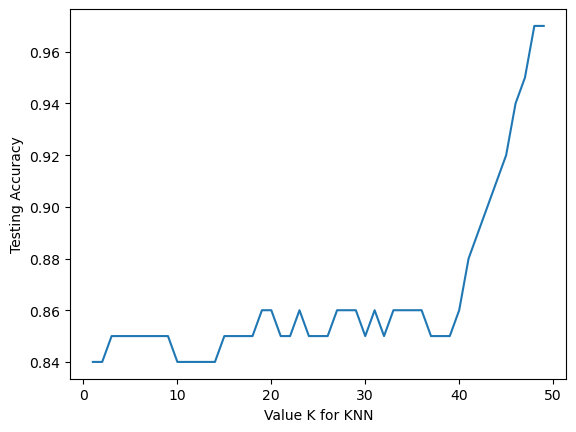

In [88]:
#We can plot the accuracy thanks to the score vector we have created
import matplotlib.pyplot as plt
plt.plot(range(1,50),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

### On va tester l'algorithme sur les données non dupliquées

In [89]:
#features extraction
x = new_df[[" Debt ratio %"," Borrowing dependency"," Liability to Equity"," Liability-Assets Flag"]]
y = new_df['Bankrupt?']

# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=40)

In [90]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [91]:
#build our knn classifier
knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Accuracy=',accuracy_score(y_pred,y_test))

Accuracy= 0.9624633431085043


In [92]:
n_neighbors=50
scores=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2)) 

Accuracy for k= 1 is: 0.97
Accuracy for k= 2 is: 0.97
Accuracy for k= 3 is: 0.97
Accuracy for k= 4 is: 0.97
Accuracy for k= 5 is: 0.97
Accuracy for k= 6 is: 0.97
Accuracy for k= 7 is: 0.97
Accuracy for k= 8 is: 0.97
Accuracy for k= 9 is: 0.97
Accuracy for k= 10 is: 0.97
Accuracy for k= 11 is: 0.97
Accuracy for k= 12 is: 0.97
Accuracy for k= 13 is: 0.97
Accuracy for k= 14 is: 0.97
Accuracy for k= 15 is: 0.97
Accuracy for k= 16 is: 0.97
Accuracy for k= 17 is: 0.97
Accuracy for k= 18 is: 0.97
Accuracy for k= 19 is: 0.97
Accuracy for k= 20 is: 0.97
Accuracy for k= 21 is: 0.97
Accuracy for k= 22 is: 0.97
Accuracy for k= 23 is: 0.97
Accuracy for k= 24 is: 0.97
Accuracy for k= 25 is: 0.97
Accuracy for k= 26 is: 0.97
Accuracy for k= 27 is: 0.97
Accuracy for k= 28 is: 0.97
Accuracy for k= 29 is: 0.97
Accuracy for k= 30 is: 0.97
Accuracy for k= 31 is: 0.97
Accuracy for k= 32 is: 0.97
Accuracy for k= 33 is: 0.97
Accuracy for k= 34 is: 0.97
Accuracy for k= 35 is: 0.97
Accuracy for k= 36 is: 0.97
A

Text(0, 0.5, 'Testing Accuracy')

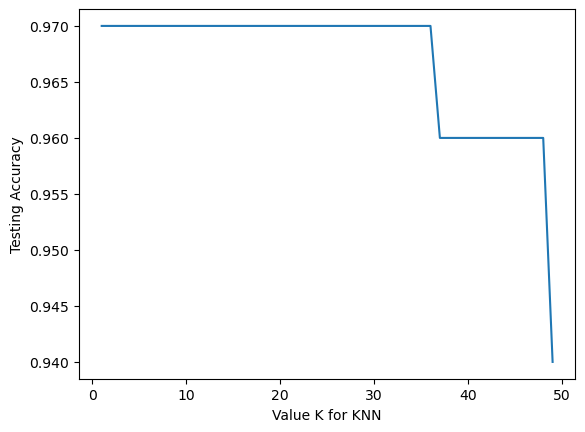

In [93]:
#We can plot the accuracy thanks to the score vector we have created
import matplotlib.pyplot as plt
plt.plot(range(1,50),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

### Random forest algo

In [95]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

sur dataset DUPLIQUE

In [120]:
#features extraction
x = new_df.drop(['Bankrupt?'], axis=1)
y = new_df['Bankrupt?']

In [121]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(df,y, test_size=0.20,random_state=30)

In [122]:
#applying tree algorithm
tree = DecisionTreeClassifier(random_state = 40)  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:1.0


In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1316
           1       1.00      1.00      1.00        48

    accuracy                           1.00      1364
   macro avg       1.00      1.00      1.00      1364
weighted avg       1.00      1.00      1.00      1364



Sur Dataset NON dupliqué

In [116]:
#features extraction
x = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']

In [117]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(df,y, test_size=0.20,random_state=30)

In [118]:
#applying tree algorithm
tree = DecisionTreeClassifier(random_state = 40)  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:1.0


In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1316
           1       1.00      1.00      1.00        48

    accuracy                           1.00      1364
   macro avg       1.00      1.00      1.00      1364
weighted avg       1.00      1.00      1.00      1364

